# Binary Star System Analysis

This assignment was given by Krittika Club of IITB as a task in their application form for Summer Projects. The following is the actual question given in their form. You can find more about the club here: 

This assignment requires the knowledge of plotting with Matplotlib, curve fitting using SciPy and also NumPy. You have been provided with the Doppler shift data (download here: https://drive.google.com/file/d/1sThNaS5kgOKpCjhgXIvo3LcOflslTKaH/view?usp=sharing) in the Balmer line of two stars in a binary star system orbiting about a common centre of mass.

Following points are given for the problem:
1. Cosmological redshift can be ignored 
2. The orbital plane of the system is assumed to be parallel to the line of sight 
3. The orbit is circular, and the whole system (or the centre of mass) is moving radially towards/away from us

Your task is to:
1. Provide an expression for the mass of each star in terms of orbital velocities of both stars, the time period of             revolution and universal constants.
2. Obtain the radial velocity of the centre of mass of the system. 
3. Having accounted for the radial velocity, plot only the orbital velocity. Fit the resultant data with a sine curve. 
4. Obtain orbital velocities of each star and hence find their masses using the result obtained in part 1. 

You are required to submit:
1. Derivation of result obtained in part 1.
2. The scatter plot of orbital velocity with a sine curve fitted to the data.
3. The entire code for the assignment. Output should have the format:
    
    Period of revolution is: <value>
    
    Mass of lighter star is: <value>
    
    Mass of heavier star is: <value>

Some things to note:
You may have to manually set the range on the Y axis to make the plot more readable. Also if you choose to find the frequency using Lomb-Scargle method, make sure you discard garbage values and accept the one that appears to satisfy the data best.

# Code

In [1]:
# importing librariers required for the task
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy.optimize import curve_fit as cf

In [2]:
%matplotlib inline

In [3]:
#loading the data
data = np.loadtxt('Binary_data 2.csv',delimiter=',')

# segregatting data into different arrays for further use
time = data[:,:1].flatten() # time in years
z1 = data[:,1:2].flatten() # redshift of star 1
z2 = data[:,2:3].flatten() # redshift of star 2

# defining a function to calculate the radial velocity of stars from redshift
def velocity(z):
    v_z = z*(sc.c/1000)
    return v_z #in km/s

v1 = velocity(z1) # velocity of star 1
v2 = velocity(z2) # velocity of star 2

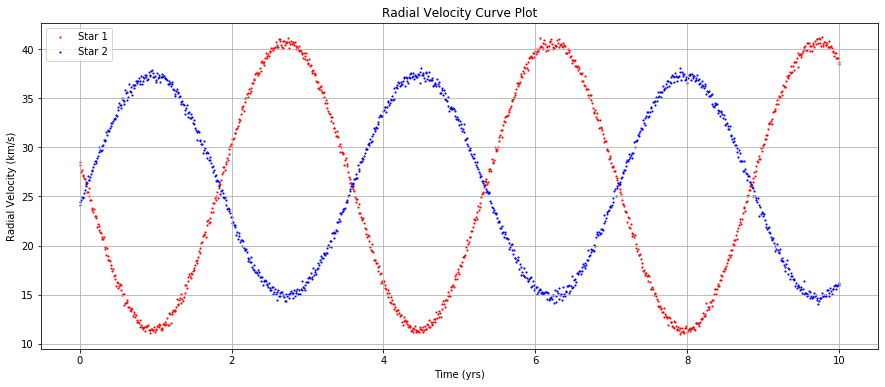

In [4]:
# ploting the radial velocity profile of the star
plt.figure(figsize=(15,6))
plt.scatter(time,v1,s=1.25,color='r',label='Star 1')
plt.scatter(time,v2,s=1.25,color='b',label='Star 2')
plt.xlabel('Time (yrs)')
plt.ylabel('Radial Velocity (km/s)')
plt.title('Radial Velocity Curve Plot')
plt.legend()
plt.grid()

In [5]:
# The curve of both the stars are shifted on y-axis which means the system itself is moving with some velocity. 
# As it is shifted above therefore the system is moving away from us. So, The radial velocities we obtained from the 
# redshift is inclusive of both the recessional velocity of the system and the orbital velocity of the stars. 
# Therefore, we need to first obtain the recessional velocity and subtract it from our radial velocity data.

# To obtain these informations such as velocity, frequency, time period, etc. from the curve, we will first fit the curves 
# of radial velocity vs time plot using scipy.optimize.curve_fit to obtain the parameters of the model  

In [6]:
#defining a model as a callable function and defining parameters of it 
def sinfit(x,a,f,p,o): # x, apmlitude, angular frequency, phase, offset
    return a*(np.sin(f*x + p)) + o 
# the parameters will provide these informations:-
# amplitude - orbital velocity of the star
# angular frequency - time period of revolution 
# offset - radial velocity of barycentre of the system

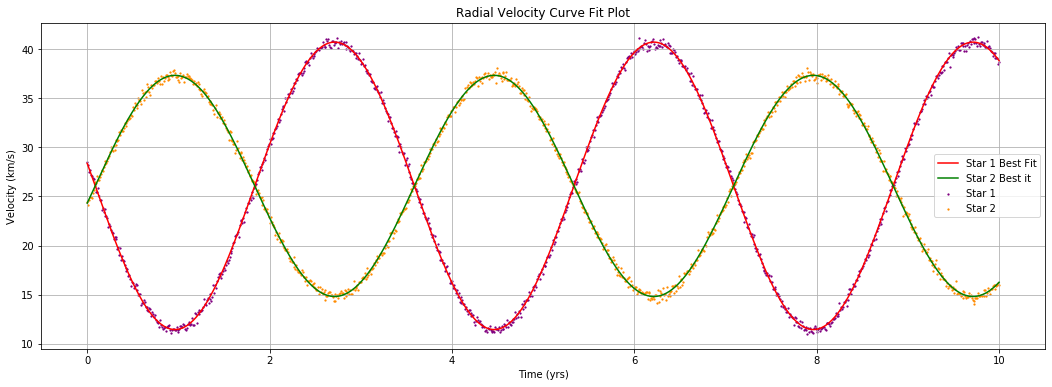

In [7]:
#guessed values for model of star 1
ga1 = np.std(v1)*(2**0.5) # RMS
gf1 = 2*np.pi / 3.6       # gussed by plugging in the curve 
gp1 = 3*np.pi             # gussed by plugging in the curve
go1 = np.mean(v1)         # mean of a shifted sine function gives it's offset value

g1=[ga1,gf1,gp1,go1]

#guessed values for model of star 2
ga2 = np.std(v2)*(2**0.5) 
gf2 = 2*np.pi / 3.6
gp2 = 0
go2 = np.mean(v2)

g2=[ga2,gf2,gp2,go2]

# generating best fit parameters and the respective errors for both of our models
p1_opt, p1_cov = cf(sinfit,time,v1,p0=g1) # for star 1
p2_opt, p2_cov = cf(sinfit,time,v2,p0=g2) # for star 2

# plotting radial velocity curve fit plot
plt.figure(figsize=(18,6))
plt.scatter(time,v1,s=1.5,color='purple',label='Star 1')              # scatter plot of v1 vs time
plt.plot(time,sinfit(time,*p1_opt),color='r',label='Star 1 Best Fit') # plot of v1 vs time
plt.scatter(time,v2,s=1.5,color='darkorange',label='Star 2')          # scatter plot of v2 vs time
plt.plot(time,sinfit(time,*p2_opt),color='g',label='Star 2 Best it')  # plot of v2 vs time
plt.xlabel('Time (yrs)')
plt.ylabel('Velocity (km/s)')
plt.title('Radial Velocity Curve Fit Plot')
plt.legend()
plt.grid()

In [8]:
# using the best fit offset parameters of star 1 and star 2 model for recessional velocity of the barycentre of the system.
rec_vel = (p1_opt[3]+p2_opt[3]) / 2 # the offset of both curves should be same or with a small difference hence, taking mean

# function to generate radial velocity of star
def orb_vel(v):
    return v - rec_vel

orb_v1 = orb_vel(v1) # radial velocity of star 1
orb_v2 = orb_vel(v2) # radial velocity of star 2

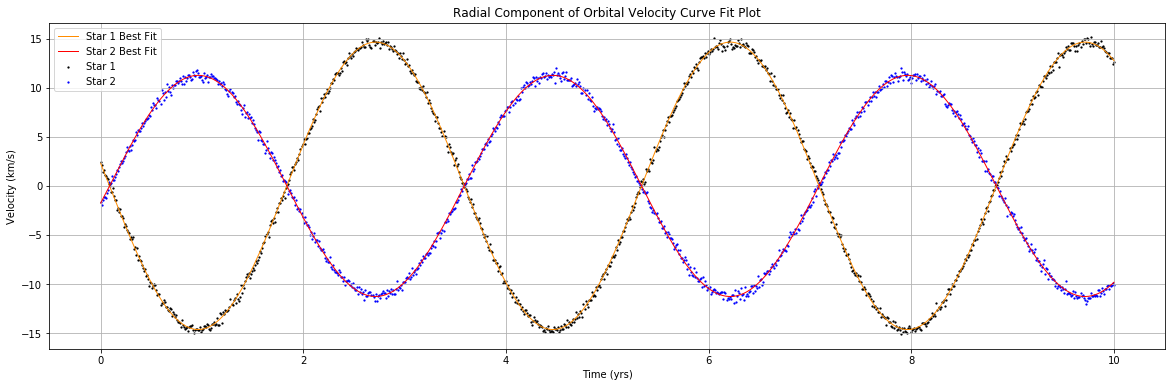

In [9]:
# the plot for radial component of velocity is generated and fitted

# guessed values for model of star 1
g_amp1 = np.std(orb_v1)*(2**0.5)  # RMS
g_freq1 = 2*np.pi / 3.6           # gussed by plugging in the curve 
g_phase1 = 3*np.pi                # gussed by plugging in the curve
g_off1 = np.mean(orb_v1)          # mean of a shifted sine function gives it's offset value

og1=[g_amp1,g_freq1,g_phase1,g_off1]

# guessed values for model of star 2
g_amp2 = np.std(orb_v2)*(2**0.5) 
g_freq2 = 2*np.pi / 3.6
g_phase2 = 0
g_off2 = np.mean(orb_v2)

og2=[g_amp2,g_freq2,g_phase2,g_off2] 

# generating best fit parameters and the respective errors for both of our models
op1_opt, op1_cov = cf(sinfit,time,orb_v1,p0=og1) # for star 1
op2_opt, op2_cov = cf(sinfit,time,orb_v2,p0=og2) # for star 2

# plotting radial velocity curve fit plot
plt.figure(figsize=(20,6))
plt.scatter(time, orb_v1, s=1.5, color='k', label='Star 1')       # scatter plot of orb_v1 vs time
plt.plot(time, sinfit(time,*op1_opt), color='darkorange', linewidth=1, label='Star 1 Best Fit')  # plot of orb_v1 vs time
plt.scatter(time, orb_v2, s=1.5, color='b', label='Star 2')                # scatter plot of orb_v2 vs time
plt.plot(time, sinfit(time,*op2_opt), color='r', linewidth=1, label='Star 2 Best Fit')  # plot of orb_v2 vs time
plt.xlabel('Time (yrs)')
plt.ylabel('Velocity (km/s)')
plt.title('Radial Component of Orbital Velocity Curve Fit Plot')
plt.legend()
plt.grid()

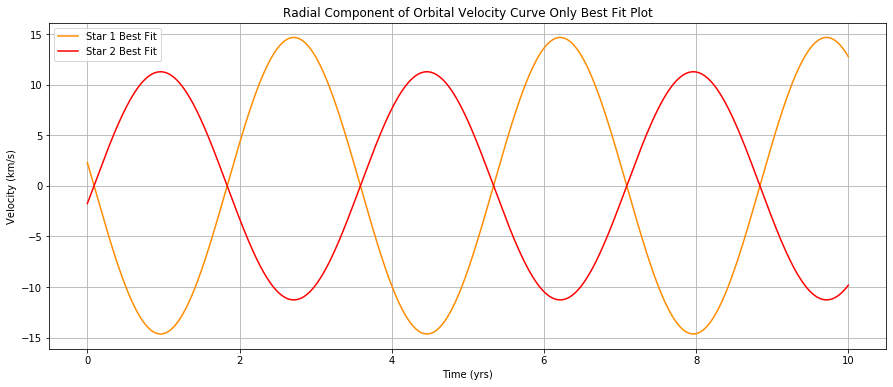

In [10]:
# plotting radial velocity curve fit plot
plt.figure(figsize=(15,6))
plt.plot(time, sinfit(time,*op1_opt), color='darkorange', label='Star 1 Best Fit')  # plot of orb_v1 vs time
plt.plot(time, sinfit(time,*op2_opt), color='red', label='Star 2 Best Fit')  # plot of orb_v2 vs time
plt.xlabel('Time (yrs)')
plt.ylabel('Velocity (km/s)')
plt.title('Radial Component of Orbital Velocity Curve Only Best Fit Plot')
plt.legend()
plt.grid()

In [11]:
# taking values from fit parameters of model
vel1 = op1_opt[0] # Orbital Velocity of Star 1
vel2 = op2_opt[0] # Orbital Velocity of Star 2
T = 2*np.pi/((op1_opt[1]+op2_opt[1])/2) #Time Period of Revolution

#the frequency of both curves should be same or with a small difference hence taking mean

In [22]:
# taking values from fit parameters of model
vel1 = op1_opt[0] # Orbital Velocity of Star 1
vel2 = op2_opt[0] # Orbital Velocity of Star 2
T = 2*np.pi/((op1_opt[1]+op2_opt[1])/2) #Time Period of Revolution

#the frequency of both curves should be same or with a small difference hence taking mean

# defining a fucntion to calculate mass of the star using orbital velocity and time period
def mass(v,v_p,P): # takes input velocities of stars in km/s and period of revolution in years 
    v12 = (v*1000) *((v*1000)+(v_p*1000))**2
    m = (P*365*24*60*60) * (v12) / (2 * np.pi * sc.G) # years converted to seconds
    m_s = m / 1.9884099e+30  # converting kg into solar mass
    return m_s   

m1 = mass(vel1,vel2,T) # mass of star 1 in terms of solar mass
m2 = mass(vel2,vel1,T) # mass of star 2 in terms of solar mass

# Output

print(f'Period of Revolution is {T} years.')

print(f'Mass of lighter star is {m2} solar mass.')

print(f'Mass of heavier star is {m1} solar mass.')

Period of Revolution is 3.5006730109938857 years.
Mass of lighter star is 1.0023301555750854 solar mass.
Mass of heavier star is 1.3026505695419242 solar mass.
